# Applied Data Science 1-Assignment 1

### Topic : Impact of Climate and Agricultural Practices on Crop Yield and Economics

In [2]:
#importing the necessary libraries for the data visulization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Using dataframe loading dataset and displaying first few entries using the head

df= pd.read_csv('climate_change_impact_on_agriculture.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [10]:
#Validating if there is NaN or null values in dataset

print(df.isnull().sum())

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


In [8]:
#Validating if there is duplicate values in dataset

print(df.duplicated().sum())

0


In [15]:
#Generating statistical summary for numerical columns

df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,2007.254000,15.938700,1560.339740,15.44914,2.261462,4.864000,55.767840,24.732700,50.92064,62.269740,697.123860
std,10.138395,11.088789,779.440499,8.59859,1.003206,3.191532,26.248766,14.335933,28.17719,20.620639,399.948873
min,1990.000000,-4.810000,205.460000,0.67000,0.477000,0.000000,10.130000,0.070000,0.53000,30.180000,75.250000
25%,1998.000000,6.512500,916.047500,7.79000,1.455750,2.000000,32.717500,13.130000,27.38000,43.775000,378.192500
50%,2008.000000,16.050000,1522.235000,15.41000,2.215000,5.000000,53.665000,24.160000,52.26000,61.715000,638.285000
75%,2016.000000,25.732500,2234.852500,23.13000,3.021000,8.000000,79.162500,37.905000,74.96250,78.895000,967.247500
max,2024.000000,34.880000,2987.170000,29.95000,4.870000,10.000000,99.900000,49.740000,99.89000,99.820000,2145.280000





### Statistical Analysis

In [12]:
def calculate_statistics(df):
    """
    Calculate the mean, median, and standard deviation for numeric columns.   
    
    """
    # By using numpy module selecting only numeric columns in dataset
    num_df = df.select_dtypes(include=[np.number])
    
    # Calculate mean, median, and standard deviation for the nunerical columns derived
    statistics_analysis = {
        "mean": num_df.mean(),
        "median": num_df.median(),
        "standard deviation": num_df.std()
    }
    
    # The statistics is obtained has dictonary,converting dictonary to readable dataframe 
    statics_df = pd.DataFrame(statistics_analysis)
    
    return statics_df

In [14]:
# Call the function and display results
result = calculate_statistics(df)
print(result)

                                    mean    median  standard deviation
Year                         2007.254000  2008.000           10.138395
Average_Temperature_C          15.938700    16.050           11.088789
Total_Precipitation_mm       1560.339740  1522.235          779.440499
CO2_Emissions_MT               15.449140    15.410            8.598590
Crop_Yield_MT_per_HA            2.261462     2.215            1.003206
Extreme_Weather_Events          4.864000     5.000            3.191532
Irrigation_Access_%            55.767840    53.665           26.248766
Pesticide_Use_KG_per_HA        24.732700    24.160           14.335933
Fertilizer_Use_KG_per_HA       50.920640    52.260           28.177190
Soil_Health_Index              62.269740    61.715           20.620639
Economic_Impact_Million_USD   697.123860   638.285          399.948873


### Bar chart: Average Pesticide_Use_KG_per_HA by Crop type

In [16]:
def plt_avg_pesticide_use(df):
    
    avg_yield_crop = df.groupby('Crop_Type')['Pesticide_Use_KG_per_HA'].mean()
    
    plt.figure(figsize=(8, 5))
    
    avg_yield_crop.plot(kind='bar', color=['green'],edgecolor='black')
    
    plt.title('Average Pesticide_Use_KG_per_HA by crop type',fontweight='bold', fontsize=14, color='darkblue')
    plt.xlabel('Crop type')
    plt.ylabel('Average Pesticide_Use_KG_per_HA',)
    plt.xticks(rotation=45)
    plt.subplots_adjust(left=0.2, right=0.9, top=0.90, bottom=0.1)
    plt.grid(axis='y', linestyle='-', linewidth=1.0)
    plt.show()

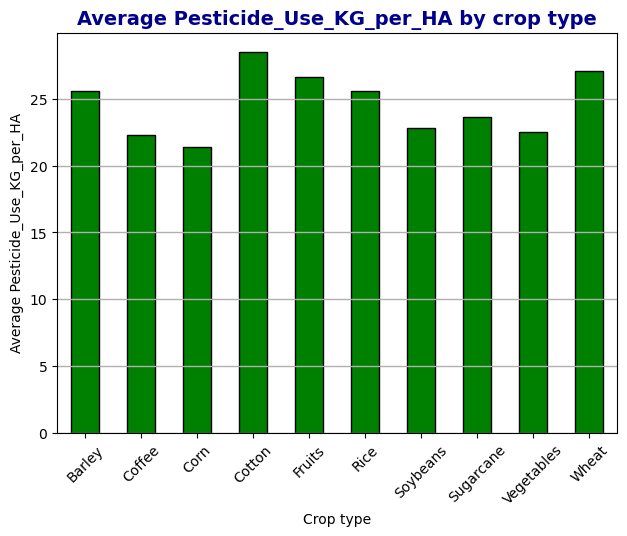

In [18]:
plt_avg_pesticide_use(df)

### Pie Chart: Soil Health Index: Category Distribution

In [20]:
def plot_soilhealth_index_category_pie_chart(df,labels):
    """
    Generates a pie chart showing the Soil Health Index: Category Distribution.
    """

    # Categorizing soil health based on the 'Soil_Health_Index' values:
    # - Rows with 'Soil_Health_Index' below 40 are labeled as 'Low' 
    # - Rows with 'Soil_Health_Index' between 40 and 69 are labeled as 'Medium'.
    # - Rows with 'Soil_Health_Index' 70 and above are labeled as 'High'.
    
    df.loc[df['Soil_Health_Index'] < 40, 'soil_health_index_category'] = 'Low'
    df.loc[(df['Soil_Health_Index'] >= 40) & (df['Soil_Health_Index'] < 70), 'soil_health_index_category'] = 'Medium'
    df.loc[df['Soil_Health_Index'] >= 70, 'soil_health_index_category'] = 'High'

    # Count occurrences of each category
    category_counts = df['soil_health_index_category'].value_counts()


    # Create the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(category_counts, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} , startangle=140, colors=['lightblue', 'pink','lightgreen'])
    plt.title('Soil Health Index: Category Distribution',fontweight='bold', fontsize=14, color='darkblue')
    plt.subplots_adjust(left=0.2, right=0.9, top=0.90, bottom=0.1)
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
    plt.show()


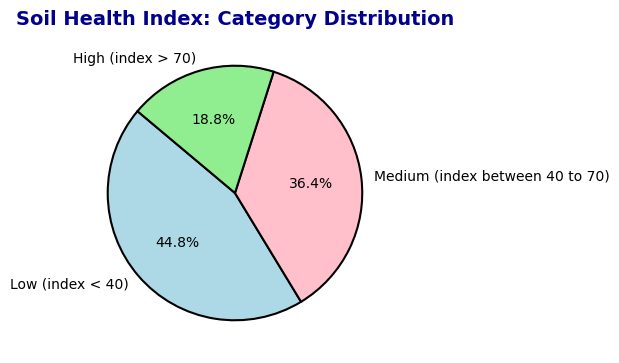

In [22]:
# Call the function to plot the pie chart
labels = [
    'Low (index < 40)',
    'Medium (index between 40 to 70)',
    'High (index > 70)'
]
plot_soilhealth_index_category_pie_chart(df,labels)


### Scatter Plot: Average Temperature on Crop yield by Crop Type

In [24]:
def plot_avg_temp_vs_crop_yield(df):
    """
    Generates a scatter plot showing the relationship between 
    Average Temperature and Crop Yield based on crop type
    
    """
    plt.figure(figsize=(12, 5))
    # Scatter plot

    #Based on unique crop type obtain the data
    # Plot the scatter plot with Temperatur against Crop yield
    for croptype in df['Crop_Type'].unique():
        crop_data = df[df['Crop_Type'] == croptype]
        plt.scatter(crop_data['Average_Temperature_C'],
                    crop_data['Crop_Yield_MT_per_HA'], label=croptype, s=50)

    plt.title('Influence of Average Temperature on Crop yield by Crop Type',fontweight='bold', fontsize=14, color='darkblue')
    plt.xlabel('Average Temperature (°C)', fontsize=12)
    plt.ylabel('Crop Yield (MT/HA)', fontsize=12)
    plt.legend(title='Crop Type', loc='upper left',fontsize='medium')    
    plt.subplots_adjust(left=0.2, right=0.9, top=0.90, bottom=0.1)
    plt.grid()
    plt.show()

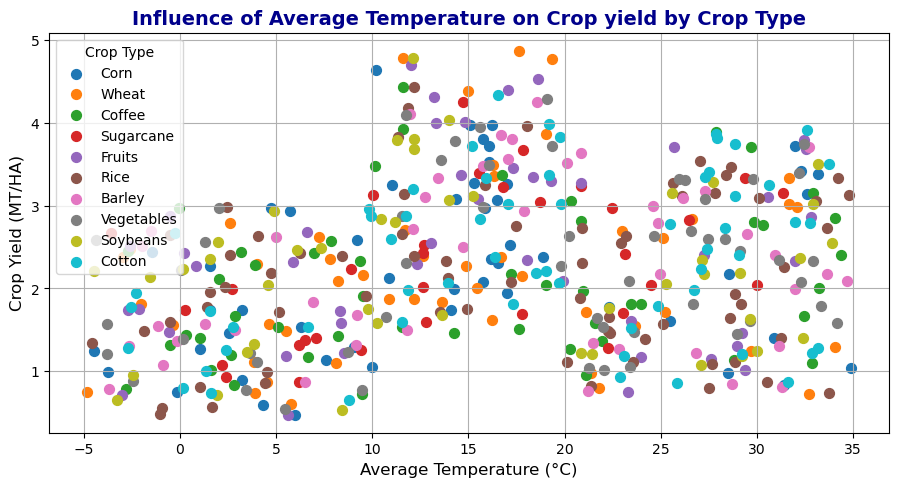

In [26]:
# Call the function to plot the scatter plot
plot_avg_temp_vs_crop_yield(df)

### Heat map Corelation

In [31]:
def plot_corelation(df):
    """
    Generates a heatmap to represent the co-relation with the selected column's
    """
    #obtaining the numerical rows in data set
    num_df = df.select_dtypes(include=[np.number])

    #specifying the column's for which corelation to be obtained
    columns_of_interest = ['Year','Average_Temperature_C','CO2_Emissions_MT', 
                        'Crop_Yield_MT_per_HA','Pesticide_Use_KG_per_HA','Fertilizer_Use_KG_per_HA','Economic_Impact_Million_USD']

    correlation_matrix = num_df[columns_of_interest].corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(8, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5)
    plt.title('Correlation Heatmap',fontweight='bold', fontsize=14, color='darkblue')
    plt.subplots_adjust(left=0.2, right=0.9, top=0.90, bottom=0.1)
    plt.show()

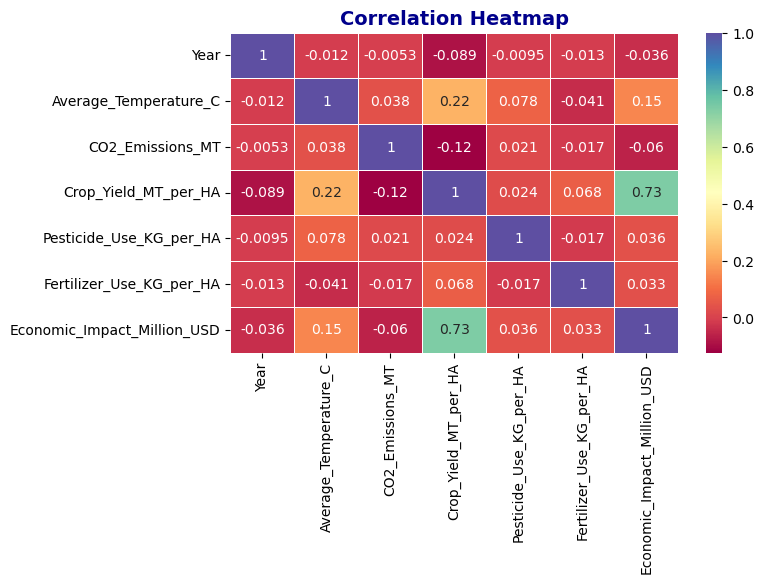

In [33]:
plot_corelation(df)